## Sequential API

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()

##### Objective is to predict house price using  predictor variables

In [5]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [6]:
from sklearn.model_selection import train_test_split
X_train_full,X_test,Y_train_full,Y_test=train_test_split(housing.data,housing.target,random_state=42)
X_train,X_valid,Y_train,Y_valid=train_test_split(X_train_full,Y_train_full,random_state=42)
#By default the train and test size is 75:25.

In [7]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_valid=scalar.transform(X_valid)
X_test=scalar.transform(X_test)

In [8]:
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
X_train.shape

(11610, 8)

In [10]:
model=keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=[8]),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(1)
])

In [11]:
model.compile(loss="mean_squared_error",optimizer=keras.optimizers.SGD(learning_rate=1e-3),metrics=['mae'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [13]:
model_history=model.fit(X_train,Y_train,epochs=20,validation_data=(X_valid,Y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.8866 - mae: 0.9900 - val_loss: 0.7126 - val_mae: 0.6368
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6577 - mae: 0.6042 - val_loss: 0.6880 - val_mae: 0.5704
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5934 - mae: 0.5618 - val_loss: 0.5803 - val_mae: 0.5352
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5557 - mae: 0.5398 - val_loss: 0.5166 - val_mae: 0.5207
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5272 - mae: 0.5237 - val_loss: 0.4895 - val_mae: 0.5022
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5033 - mae: 0.5113 - val_loss: 0.4951 - val_mae: 0.4934
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4854 - mae: 0.5010 - val_loss: 0.4861 - val_mae: 0.4838
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.

In [14]:
mae_test=model.evaluate(X_test,Y_test)

162/162 [==============================] - 0s 999us/step - loss: 0.3942 - mae: 0.4502


In [15]:
model_history.history

{'loss': [1.8866397142410278,
  0.6577126979827881,
  0.593418538570404,
  0.5557191371917725,
  0.5271904468536377,
  0.5032976269721985,
  0.48535558581352234,
  0.47091811895370483,
  0.45779937505722046,
  0.4474469721317291,
  0.4393136501312256,
  0.43176087737083435,
  0.4260515868663788,
  0.4201764762401581,
  0.41549986600875854,
  0.41116511821746826,
  0.4077068567276001,
  0.4039528965950012,
  0.4004494547843933,
  0.39796027541160583],
 'mae': [0.9900256991386414,
  0.6041510701179504,
  0.5618006587028503,
  0.5398454070091248,
  0.5237293839454651,
  0.5112562775611877,
  0.5010154247283936,
  0.492448091506958,
  0.4857262969017029,
  0.4797375500202179,
  0.4744163453578949,
  0.4703480303287506,
  0.46740880608558655,
  0.46360209584236145,
  0.4612663984298706,
  0.4591343402862549,
  0.4568699896335602,
  0.4545365273952484,
  0.4521064758300781,
  0.45083147287368774],
 'val_loss': [0.7126054167747498,
  0.6880086660385132,
  0.580328643321991,
  0.51660853624343

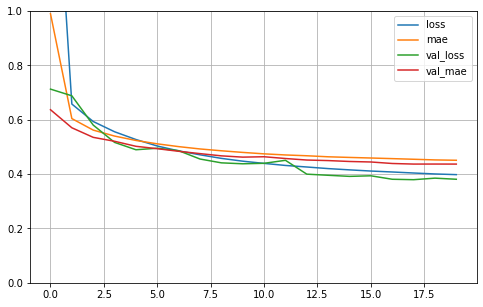

In [16]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)  #To set y-axis between 0 and 1
plt.show()

In [17]:
X_new=X_test[0:3]

In [18]:
model_pred=model.predict(X_new)
model_pred

array([[0.5328768],
       [1.8915398],
       [3.4040873]], dtype=float32)

In [19]:
del model

In [20]:
keras.backend.clear_session()   #Frees up the resources for our next model.

## Functional API

Not all neural network models are simple. Some may have complex topologies. SOme may have multiple inputs or multiple outputs. For example, a wide and depp neural network connects all or part of the input to the output directly.

The Wide Linkage where the inputs are directly connected to the output is not possible in the Sequential API.

In [22]:
input_=keras.layers.Input(8)   #As there are 8 independent layers.
hidden1=keras.layers.Dense(30,activation='relu')(input_)
hidden2=keras.layers.Dense(30,activation='relu')(hidden1)
concat=keras.layers.concatenate([input_,hidden2])
output=keras.layers.Dense(1)(concat)  #Since this is regression problem, there can be only one output.
model=keras.models.Model(inputs=[input_],outputs=[output])

In Sequential, we first created model and then the layers. In Fuctional we first join the layers and then create the model.

In [23]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 30)           270         ['input_2[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 30)           930         ['dense_3[0][0]']                
                                                                                                  
 concatenate_1 (Concatenate)    (None, 38)           0           ['input_2[0][0]',                
                                                                  'dense_4[0][0]']            

In [25]:
model.compile(loss='mean_squared_error',
             optimizer=keras.optimizers.SGD(learning_rate=1e-3),
             metrics=['mae'])

In [26]:
model_history=model.fit(X_train,Y_train,epochs=20,validation_data=(X_valid,Y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.8422 - mae: 0.9135 - val_loss: 1.7479 - val_mae: 0.6461
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7258 - mae: 0.6194 - val_loss: 0.7584 - val_mae: 0.5884
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6472 - mae: 0.5835 - val_loss: 0.6156 - val_mae: 0.5509
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5944 - mae: 0.5572 - val_loss: 0.5442 - val_mae: 0.5291
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5538 - mae: 0.5361 - val_loss: 0.5013 - val_mae: 0.5067
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5217 - mae: 0.5201 - val_loss: 0.4749 - val_mae: 0.4918
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4970 - mae: 0.5071 - val_loss: 0.4519 - val_mae: 0.4811
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.

In [27]:
mae_test=model.evaluate(X_test,Y_test)

162/162 [==============================] - 0s 956us/step - loss: 0.4004 - mae: 0.4558


In [29]:
model_history.history

{'loss': [1.8422441482543945,
  0.7257976531982422,
  0.6472156047821045,
  0.5944115519523621,
  0.5538226962089539,
  0.5217078924179077,
  0.4970484972000122,
  0.4783681333065033,
  0.46334925293922424,
  0.4515114724636078,
  0.44253867864608765,
  0.43484756350517273,
  0.4286794662475586,
  0.4232075810432434,
  0.41852107644081116,
  0.41442087292671204,
  0.41074076294898987,
  0.40751466155052185,
  0.40391647815704346,
  0.4012841582298279],
 'mae': [0.9134848713874817,
  0.6194172501564026,
  0.5834541916847229,
  0.5572080016136169,
  0.536125123500824,
  0.5201269388198853,
  0.5070964097976685,
  0.4967614412307739,
  0.4894550144672394,
  0.48322609066963196,
  0.477959543466568,
  0.47430795431137085,
  0.47103071212768555,
  0.4680231213569641,
  0.46599775552749634,
  0.4642031788825989,
  0.4617851674556732,
  0.4600357115268707,
  0.4576852321624756,
  0.4560244083404541],
 'val_loss': [1.7479069232940674,
  0.7584145069122314,
  0.6156330108642578,
  0.54415130615

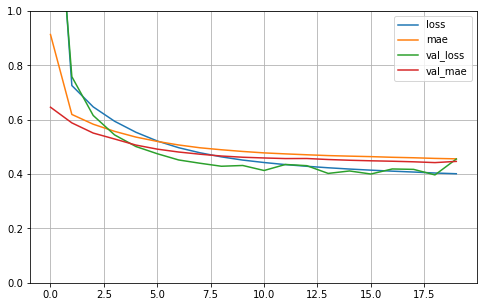

In [30]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)  #To set y-axis between 0 and 1
plt.show()

In [36]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 30)           270         ['input_2[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 30)           930         ['dense_3[0][0]']                
                                                                                                  
 concatenate_1 (Concatenate)    (None, 38)           0           ['input_2[0][0]',                
                                                                  'dense_4[0][0]']            

In [37]:
y_pred=model.predict(X_new)

In [38]:
y_pred

array([[0.6785227],
       [1.814851 ],
       [3.6716835]], dtype=float32)